In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams #For changing text properties
import cmocean #A package with beautiful colormaps
from cartopy import crs as ccrs #Useful for plotting maps
import cartopy.util #Requires separate import
from cartopy.util import add_cyclic_point
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.path as mpath
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

## In-class activity: use first exam score to estimate final exam score
### First exam scores: [65,67,71,71,66,75,67,70,71,69,69]
### Final exam scores: [175,133,185,163,126,198,153,163,159,151,159]

<span style="font-size: 24px; color: red; font-weight: bold;">How can we define numpy arrays for first and exam scores? Hint: use np.array.</span>

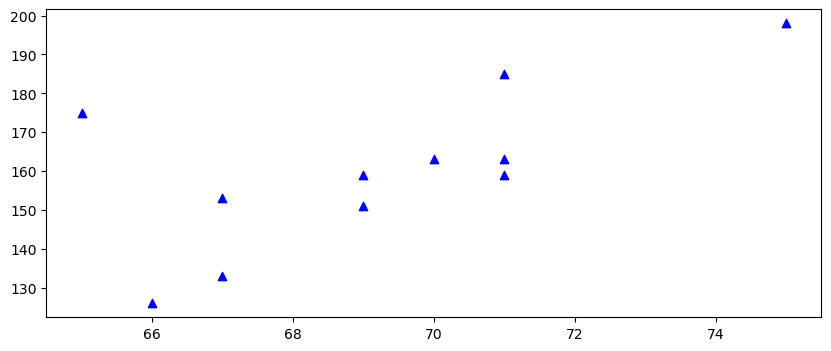

In [3]:
X = np.array([65,67,71,71,66,75,67,70,71,69,69],float)
Y = np.array([175,133,185,163,126,198,153,163,159,151,159],float)
figure = plt.figure(figsize=(10,4))
plt.scatter(X, Y, marker='^', c='b')

## Using equations in the lecture slides to calculate the slope and intercept.

In [4]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)
X_anom = X-X_mean
Y_anom = Y-Y_mean
print(X_anom)

[-4.18181818 -2.18181818  1.81818182  1.81818182 -3.18181818  5.81818182
 -2.18181818  0.81818182  1.81818182 -0.18181818 -0.18181818]


In [5]:
datA = np.arange(10)
datB = np.zeros(10)+2
print('A:',datA,'B:',datB)

A: [0 1 2 3 4 5 6 7 8 9] B: [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


In [6]:
# define two numpy arrays
datA = np.arange(10)
datB = np.zeros(10)+2
print('A:',datA,'B:',datB)
# add,subtraction,multiplication,division
dat = datA+datB
print('Add:',dat)
dat = datA-datB
print('Subtraction:',dat)
dat = datA/datB
print('division:',dat)
# compute the element-wise product
datAB = datA*datB
print('multiplication:',datAB)
# compute the sum of the array
datA_sum = np.sum(datA)
print('sum of all elements in an array:',datA_sum)
# compute the square, cube, or nth power of the array
datB_sq = datB**2
print('square of each element in an array:',datB_sq)
datB_cu = datB**3
print('cube of each element in an array:',datB_cu)

A: [0 1 2 3 4 5 6 7 8 9] B: [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
Add: [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
Subtraction: [-2. -1.  0.  1.  2.  3.  4.  5.  6.  7.]
division: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
multiplication: [ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18.]
sum of all elements in an array: 45
square of each element in an array: [4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
cube of each element in an array: [8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]


In [6]:
# Now compute the covariance of X and Y
cov_XY = (np.sum(X_anom * Y_anom)) / len(X)
# Now compute the variance of X and Y
var_X = np.sum(X_anom**2) / len(X)
var_Y = np.sum(Y_anom**2) / len(Y) 
# Now compute the slope
slope = (np.sum(X_anom * Y_anom)) / np.sum(X_anom**2)
slope = cov_XY / var_X
# Now compute the intercept
intercept = Y_mean - slope * X_mean
print(slope,intercept)

4.827394209354118 -173.51336302895308


## Linear regression
### scipy.stats.linregress: Calculate a linear least-squares regression for two sets of measurements.
### https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [7]:
from scipy.stats import linregress

In [8]:
# Use linregress function from scipy.stats
slope, intercept, corr_coef, p_value, std_err = linregress(X,Y)
# print the slope and intercept
print(slope,intercept)
# print the Pearson Correlation coefficient
print(corr_coef)

result = linregress(X, Y)
print(result)

4.827394209354119 -173.51336302895314
0.6630935909995176
LinregressResult(slope=np.float64(4.827394209354119), intercept=np.float64(-173.51336302895314), rvalue=np.float64(0.6630935909995176), pvalue=np.float64(0.026150151531087084), stderr=np.float64(1.8164759883874757), intercept_stderr=np.float64(125.76450515624121))


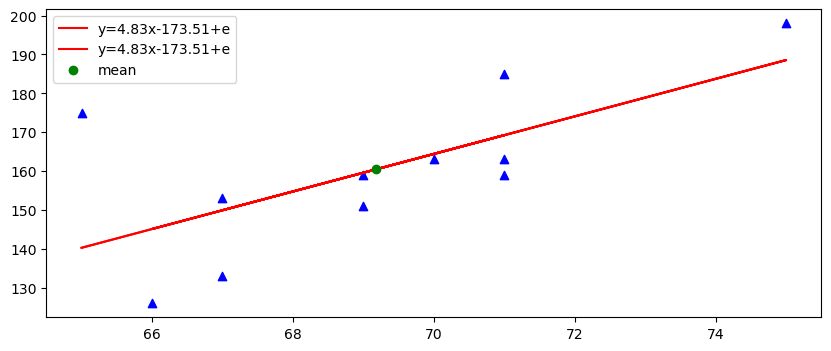

In [10]:
figure = plt.figure(figsize=(10,4))
plt.scatter(X, Y, marker='^', c='b')
# Add the linear regression line to the scatterplot
# The x-axis is X, and the y-axis is the predicted y
yhat = intercept + slope*X
plt.plot(X, intercept + slope*X, 'r', label='y='+f"{slope:.2f}"+'x'+f"{intercept:.2f}"+'+e')
plt.plot(X, yhat, 'r', label='y='+f"{slope:.2f}"+'x'+f"{intercept:.2f}"+'+e')

# Add the dot represent the mean of x and the mean of y to the scatterplot
X_mean = np.mean(X)
Y_mean = np.mean(Y)
plt.plot(X_mean, Y_mean, marker='o', linestyle='', color='g', label='mean')

plt.legend()
plt.show()

In [7]:
# test some properties of linear regression
Yhat = intercept+slope*X
error = Y-Yhat
print(np.mean(error))
print('mean of observed Y values: ',np.mean(Y))
print('mean of predicted Y values: ',np.mean(Yhat))

2.5837917664003644e-15
mean of observed Y values:  160.45454545454547
mean of predicted Y values:  160.45454545454547


In [9]:
# introduce for loop
k = 0
for i in Y:
    print(i,Y[k])
    k = k+1

175.0 175.0
133.0 133.0
185.0 185.0
163.0 163.0
126.0 126.0
198.0 198.0
153.0 153.0
163.0 163.0
159.0 159.0
151.0 151.0
159.0 159.0


## Calculate SSE, SSR, and SST and the coefficient of determination $R^2$

In [8]:
# Define a function
def var_anlys(x,y,slope,intercept):
    """Calculate SSE for a guessed linear regression line
    
    Input parameter:
        x,y (1d numpy array): 
            the numpy arrays with the data points
        slope (float): 
            value for the regression line slope
        
        intercept (float): intercept of the line
    Returns:
        The SSE value (float)
        The SST value (float)
        The SSR value (float)
        The R^2 value (float)
    """
    yhat = intercept+slope*x
    error = y-yhat
    SSE = 0
    for e in error:
        SSE = SSE+e**2

    SST = 0
    for i in y:
        SST = SST+(i-np.mean(y))**2

    SSR = 0
    for i in yhat:
        SSR = SSR+(i-np.mean(y))**2

    R2 = SSR/SST
    R2_1 = 1-SSE/SST
    return SSE,SST,SSR,R2,R2_1

In [11]:
sse,sst,ssr,R2,R2_1 = var_anlys(X,Y,slope,intercept)
print('SSE: ',sse)
print('SST: ',sst)
print('SSR: ',ssr)
print('R^2: ',R2)
print('R^2: ',R2_1)

SSE:  2424.2951002227182
SST:  4326.727272727273
SSR:  1902.432172504555
R^2:  0.43969311042463555
R^2:  0.43969311042463544


## Now, we use another function in Python for linear regression, which can be used for multiple linear regression as well.
### The function we introduce here is statsmodels.api.sm.OLS.
### OLS is Ordinary Least Squares, which means the linear regression model obtains its regressoin coefficients by minimizing the sum of squared errors. 
### https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

In [9]:
import statsmodels.api as sm

In [10]:
print(X)
x = sm.add_constant(X)
print(x)

[65. 67. 71. 71. 66. 75. 67. 70. 71. 69. 69.]
[[ 1. 65.]
 [ 1. 67.]
 [ 1. 71.]
 [ 1. 71.]
 [ 1. 66.]
 [ 1. 75.]
 [ 1. 67.]
 [ 1. 70.]
 [ 1. 71.]
 [ 1. 69.]
 [ 1. 69.]]


In [12]:
x = sm.add_constant(X)

results = sm.OLS(Y,x).fit()


# Access individual parameters (coefficients)
print("\nCoefficients:")
print(results.params)

# print the complete result
results.summary()


Coefficients:
[-173.51336303    4.82739421]


/knight/mamba_aug23/envs/sep24_env/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     7.063
Date:                Mon, 07 Apr 2025   Prob (F-statistic):             0.0262
Time:                        17:45:52   Log-Likelihood:                -45.283
No. Observations:                  11   AIC:                             94.57
Df Residuals:                       9   BIC:                             95.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -173.5134    125.765     -1.380      0.201    -458.012     110.986
x1             4.8274      1.816      2.658      0.026       0.718       8.937
==============================================================================
Omnibus:                        3.873   Durbin-Watson:                   2.230
Prob(Omnibus):                  0.144   Jarque-Bera (JB):                1.575
Skew:                           0.915   Prob(JB):                        0.455
Kurtosis:                       3.290   Cond. No.                     1.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Another function from sklearn package to build a linear regression model. Linear regression model can be considered as a simple machine learning (ML) model. 

## This function is sklearn.linear_model.LinearRegression. This is a machine learning model and thus it follows the idea and structure of training a ML model.

### usage: fit(X, y, sample_weight=None)
### Fit linear model.

### Input Parameters:
### X{array-like, sparse matrix} of shape (n_samples, n_features) Training data.

### yarray-like of shape (n_samples,) or (n_samples, n_targets) Target values. 

### https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [13]:
from sklearn.linear_model import LinearRegression
# The shape of predictor X must be (number of samples, number of features)
# In the exercise example, the number of samples is 11 and number of features is 1
# because we only have the first exam score as a feature. 

x = np.zeros(shape=[len(X),1])
x[:,0] = X

reg = LinearRegression().fit(x, Y)
print(reg.score(x, Y))

print('slope: ',reg.coef_)

print('intercept: ',reg.intercept_)

# When using an ML model, the goal is to apply the ML, which is trained on the known data set,
# to predict new data. 
print(reg.predict(np.array([[100]])))

0.43969311042463577
slope:  [4.82739421]
intercept:  -173.5133630289532
[309.22605791]


## Curvilinear regression

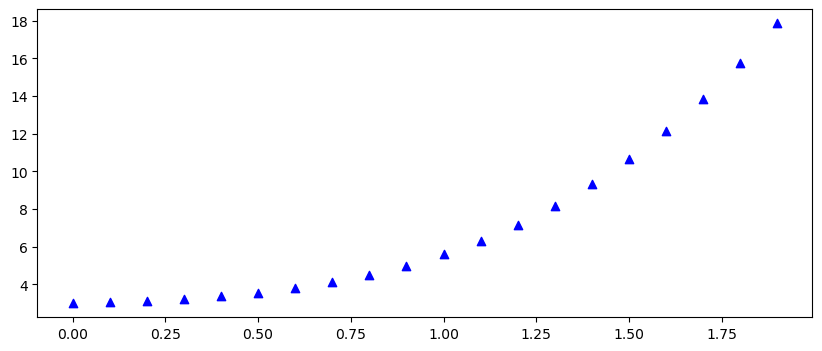

In [13]:
# two new data sets x1 and y1
x1 = np.array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])
y1 = np.array([ 3.   ,  3.062,  3.136,  3.234,  3.368,  3.55 ,  3.792,  4.106,
        4.504,  4.998,  5.6  ,  6.322,  7.176,  8.174,  9.328, 10.65 ,
       12.152, 13.846, 15.744, 17.858])

# plot scatterplot
figure = plt.figure(figsize=(10,4))
plt.scatter(x1, y1, marker='^', c='b')

## Now we want to use a simple linear regression model to estimate/predict the relationship between x1 and y1.

### Assuming $\hat{y}$ = $b_{1}$x1 + $b_{0}$ is an apporiate function to model the relationship between x1 and y1. 

$b_{0}$=0.3324 
$b_{1}$=7.208
$\hat{y}$ = 7.208 x1 + 0.3324

<span style="font-size: 24px; color: red; font-weight: bold;">1. Follow the example above to use statsmodels.api.OLS to model the relationship between x1 and y1. (Present: Group 2)</span>

<span style="font-size: 24px; color: red; font-weight: bold;">2. Extract the number of $b_{0}$ and $b_{1}$, and write down the linear regression function. (Present: Group 3)</span>

<span style="font-size: 24px; color: red; font-weight: bold;">3. Extract the number of the coefficient of determination $R^2$. (Present: Group 3)</span>

<span style="font-size: 24px; color: red; font-weight: bold;">4. Plot the scatterplot of x1 and y1. (Present: Group 4)</span>

<span style="font-size: 24px; color: red; font-weight: bold;">5. Add the linear regression line to the scatterplot. (Present: Group 4)</span>

<span style="font-size: 24px; color: red; font-weight: bold;">6. Add the label or a textbox to show the function of the linear regression line. (Present: Group 5)</span>

<span style="font-size: 24px; color: red; font-weight: bold;">7. Add the mean of x1 and the mean of y1 to the scatterplot. (Present: Group 5)</span>

<span style="font-size: 24px; color: red; font-weight: bold;">8. How would you address the nonlinearity in the relationship between x1 and y1. (Present: Group 6)</span>

In [14]:
# define x for the OLS function
x = sm.add_constant(x1)

# run the model to fit the data
results = sm.OLS(y1,x).fit()


# Access individual parameters (coefficients)
print("\nCoefficients:")
print(results.params)

# print the complete result
results.summary()


Coefficients:
[0.3324 7.208 ]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     105.8
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           5.80e-09
Time:                        17:48:55   Log-Likelihood:                -39.164
No. Observations:                  20   AIC:                             82.33
Df Residuals:                      18   BIC:                             84.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3324      0.779      0.427      0.675      -1.304       1.969
x1             7.2080      0.701     10.284      0.000       5.735       8.681
==============================================================================
Omnibus:                        2.199   Durbin-Watson:                   0.135
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.817
Skew:                           0.638   Prob(JB):                        0.403
Kurtosis:                       2.258   Cond. No.                         3.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

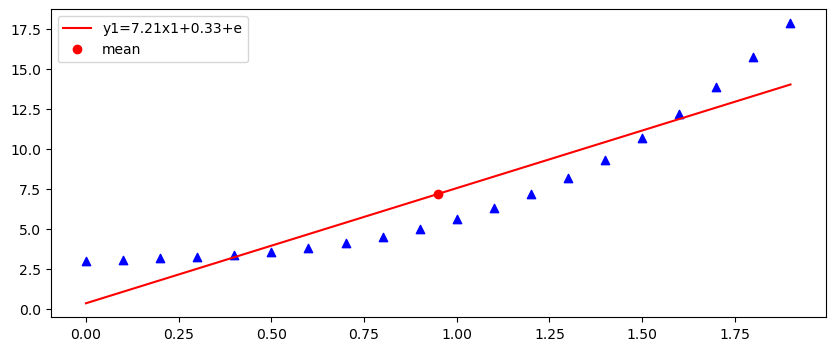

In [16]:
figure = plt.figure(figsize=(10,4))
plt.scatter(x1, y1, marker='^', c='b')
# Add the linear line to the scatterplot
yhat = results.params[0] + results.params[1]*x1
plt.plot(x1, yhat, 'r', label='y1='+f"{results.params[1]:.2f}"+'x1+'+f"{results.params[0]:.2f}"+'+e')

# Add the dot represent the mean of x and the mean of y to the scatterplot
X_mean = np.mean(x1)
Y_mean = np.mean(y1)
plt.plot(X_mean, Y_mean, marker='o', linestyle='', color='r', label='mean')

plt.legend()
plt.show()

### Now we want to add another term to estimate the nonlinearity in the relationship between x1 and y1. 
### Assuming $\hat{y}$ = $b_{1}$x1 + $b_{2}$x1$^3$ + $b_{0}$ is an apporiate function to model the relationship between x1 and y1. 
### We want to find the regression parameters $b_{0}$, $b_{1}$, and $b_{2}$.

In [17]:
# define value for x1^3
x_nonlin = x1**3

# combine x1 and x1^3 into a 2-D matrix
x1_new = np.ndarray((len(x1),2))
for ii in range(len(x1)):
    x1_new[ii,0] = x1[ii]
    x1_new[ii,1] = x_nonlin[ii]
print(x1_new.shape)
print(x1_new)

(20, 2)
[[0.000e+00 0.000e+00]
 [1.000e-01 1.000e-03]
 [2.000e-01 8.000e-03]
 [3.000e-01 2.700e-02]
 [4.000e-01 6.400e-02]
 [5.000e-01 1.250e-01]
 [6.000e-01 2.160e-01]
 [7.000e-01 3.430e-01]
 [8.000e-01 5.120e-01]
 [9.000e-01 7.290e-01]
 [1.000e+00 1.000e+00]
 [1.100e+00 1.331e+00]
 [1.200e+00 1.728e+00]
 [1.300e+00 2.197e+00]
 [1.400e+00 2.744e+00]
 [1.500e+00 3.375e+00]
 [1.600e+00 4.096e+00]
 [1.700e+00 4.913e+00]
 [1.800e+00 5.832e+00]
 [1.900e+00 6.859e+00]]


In [18]:
x = sm.add_constant(x1_new)

results_2 = sm.OLS(y1,x).fit()


# Access individual parameters (coefficients)
print("\nCoefficients:")
print(results_2.params)

# print the complete result
results_2.summary()


Coefficients:
[3.  0.6 2. ]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.743e+30
Date:                Mon, 07 Apr 2025   Prob (F-statistic):          7.87e-256
Time:                        18:26:12   Log-Likelihood:                 632.61
No. Observations:                  20   AIC:                            -1259.
Df Residuals:                      17   BIC:                            -1256.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0000   2.66e-15   1.13e+15      0.000       3.000       3.000
x1             0.6000   4.54e-15   1.32e+14      0.000       0.600       0.600
x2             2.0000   1.25e-15   1.59e+15      0.000       2.000       2.000
==============================================================================
Omnibus:                       22.455   Durbin-Watson:                   0.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.925
Skew:                           2.085   Prob(JB):                     5.24e-07
Kurtosis:                       7.162   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpret the results of fitting the data to the regression model

<span style="font-size: 24px; color: red; font-weight: bold;">9. Extract the number of the regression parameters and write down the regression function. (Present: Group 6)</span>

<span style="font-size: 24px; color: red; font-weight: bold;">10. Extract the number of the coefficient of determination $R^2$. (Present: Group 6)</span>

<span style="font-size: 24px; color: red; font-weight: bold;">11. Add the curvilinear regression line (predicted y1) to the scatterplot. (Present: Group 7 and 8)</span>

<span style="font-size: 24px; color: red; font-weight: bold;">12. Add the label or a textbox to show the function of the curvilinear regression line. (Present: Group 7 and 8)</span>

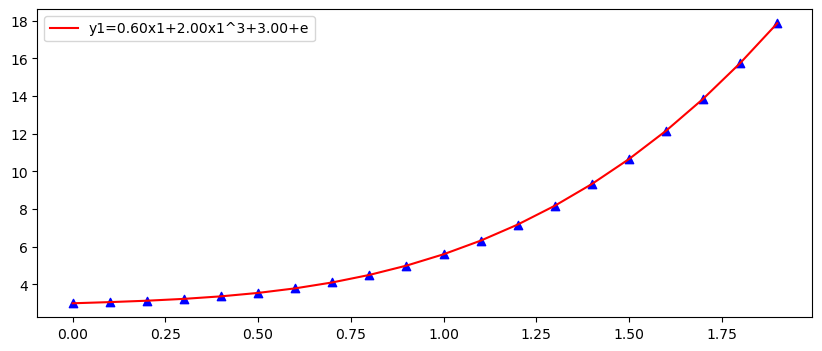

In [22]:
figure = plt.figure(figsize=(10,4))
plt.scatter(x1, y1, marker='^', c='b')
yhat = results_2.params[0] + results_2.params[1]*x1 + results_2.params[2]*x1**3
plt.plot(x1, yhat, 'r', label='y1='+f"{results_2.params[1]:.2f}"+'x1+'+f"{results_2.params[2]:.2f}"+'x1^3+'+f"{results_2.params[0]:.2f}"+'+e')

plt.legend()
plt.show()